In [59]:
import numpy as np
import tqdm.notebook as pbar

from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline

In [79]:
np.random.seed(42)
N = 7

# Алгоритм 3

## 1. $\pi_n$

In [91]:
m = 2**N

t = np.linspace(0,1,m+1)
Wt = np.cumsum(np.append(0,np.random.randn(t.shape[0]-1))) / np.sqrt(m)

Text(0.5, 1.0, 'm = 2^7')

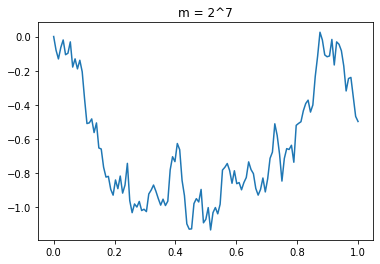

In [92]:
plt.plot(t, Wt)
plt.title(f"m = 2^{N}")

/tmp/ipykernel_108566/3432801830.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


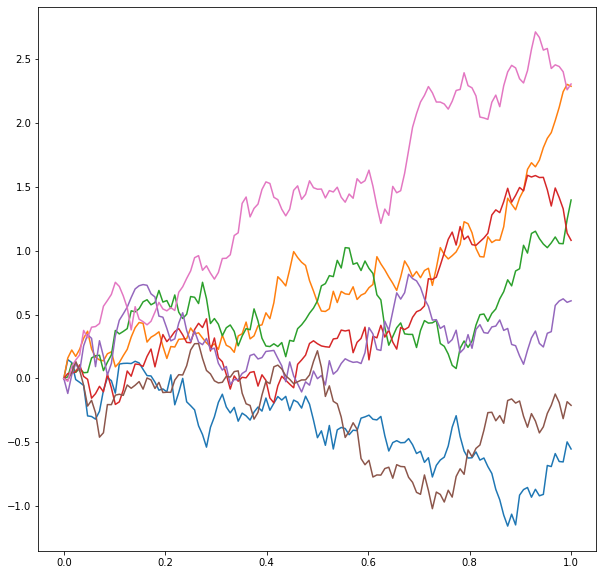

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
for _ in range(7):
    Wt = np.cumsum(np.append(0,np.random.randn(t.shape[0]-1))) / np.sqrt(m)
    ax.plot(t,Wt)

fig.show()

## 2. $\pi_{n+1}$

In [104]:
n1 = N + 1
m1 = 2**n1 + 1

t1 = np.linspace(0,1,m1)
Wt1 = np.zeros(t1.shape)

for k in pbar.trange(m):
    Wt1[2*k]     = Wt[k]
    Wt1[2*k + 1] = (
            (Wt[k] + Wt[k+1]) / 2 +
            np.random.randn() * (2 ** (-N/2-1))
    )

Wt1[-1] = Wt[-1]

  0%|          | 0/128 [00:00<?, ?it/s]

In [105]:
Wt1

array([ 0.        , -0.08213461, -0.02217072,  0.04469218,  0.09522617,
        0.2092399 ,  0.14439042,  0.16483852,  0.18468559,  0.27196746,
        0.37604657,  0.33180981,  0.31916705,  0.35219992,  0.40117731,
        0.46436886,  0.40621661,  0.32033541,  0.42995703,  0.56527527,
        0.56505583,  0.5245686 ,  0.6099426 ,  0.62194767,  0.6575217 ,
        0.68595017,  0.75231885,  0.76220069,  0.72006128,  0.61234532,
        0.64588492,  0.62013578,  0.55353597,  0.55609715,  0.37973296,
        0.41036098,  0.56147771,  0.52110623,  0.46396694,  0.42493307,
        0.4444107 ,  0.4509989 ,  0.41994363,  0.43437543,  0.4471148 ,
        0.45481565,  0.51921646,  0.57880549,  0.59527229,  0.64924534,
        0.54373504,  0.5279124 ,  0.52896343,  0.57326093,  0.55394021,
        0.48579438,  0.53195881,  0.5607252 ,  0.67402943,  0.71660526,
        0.71742589,  0.81549249,  0.78238053,  0.82739205,  0.84097151,
        0.87899687,  0.94469292,  0.9526617 ,  0.96069312,  0.84

In [106]:
Wt

array([ 0.        , -0.02217072,  0.09522617,  0.14439042,  0.18468559,
        0.37604657,  0.31916705,  0.40117731,  0.40621661,  0.42995703,
        0.56505583,  0.6099426 ,  0.6575217 ,  0.75231885,  0.72006128,
        0.64588492,  0.55353597,  0.37973296,  0.56147771,  0.46396694,
        0.4444107 ,  0.41994363,  0.4471148 ,  0.51921646,  0.59527229,
        0.54373504,  0.52896343,  0.55394021,  0.53195881,  0.67402943,
        0.71742589,  0.78238053,  0.84097151,  0.94469292,  0.96069312,
        0.84606828,  0.88139604,  0.82382368,  0.77710013,  0.82892787,
        0.93837767,  0.94025783,  0.96755507,  1.11801103,  1.13929081,
        1.36924928,  1.41923374,  1.26360283,  1.33018945,  1.36387941,
        1.47787853,  1.53737992,  1.52514202,  1.41692832,  1.3984531 ,
        1.323277  ,  1.2719655 ,  1.32398897,  1.47158907,  1.50647343,
        1.40077131,  1.440069  ,  1.54583728,  1.49193958,  1.48009402,
        1.48139229,  1.41201642,  1.46931686,  1.45862645,  1.49

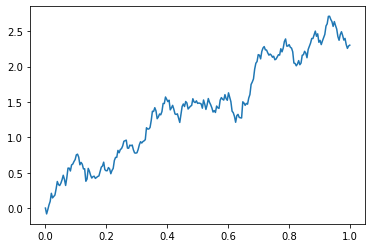

In [107]:
plt.plot(t1, Wt1)

## 3. compare

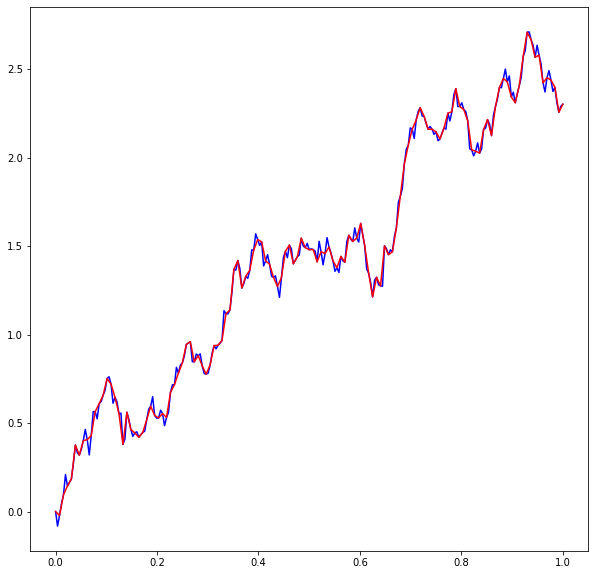

In [108]:
fig, ax = plt.subplots(figsize = (10,10))

ax.plot(t1,Wt1,'b-')
ax.plot(t,Wt, 'r-')

# Розклад за функціями Хаара

In [127]:
# def indicator(t,a,b):
#     return a <= t < b
#
#
# def haar(t,k,n):
#     assert 0 <= t <= 1, f"wrong time interval t={t}"
#     denom = 2 ** n
#     numr1 = 2 * (k-1)
#     numr2 = 2*k - 1
#     numr3 = 2*k
#     return (2**((n-1)/2)) * (
#         indicator(
#             t, numr1/denom, numr2/denom
#         ) - indicator(
#         t, numr2/denom, numr3/denom
#     )
#     )


def s(t,k,n):
    # haar_to_int = lambda t: haar(t,k,n)
    # return integrate.quad(haar_to_int, 0, t)[0]

    denom = 2 ** (n)
    numr1 = (2 * (k-1)) / denom
    numr2 = (2*k - 1) / denom
    numr3 = (2*k) / denom

    if   0     <= t < numr1:
        return 0
    elif numr1 <= t < numr2:
        return numr2 - t
    elif numr2 <= t < numr3:
        return 2*numr2 - 1 - t
    elif numr3 <= t <= 1:
        return 2*numr2 - numr3 - numr1
    else:
        raise AssertionError(f"wrong time interval t={t}")


def w(t,n,norm_vec):
    s_vec = np.array(list(map(
        lambda k: s(t,k,n),
        list(range(1,2**n))
    )))
    return np.dot(s_vec, norm_vec)

In [128]:
norm_vec = np.random.randn(2**N-1)
w2 = np.array([
    w(t_i, N, norm_vec) for t_i in t
])

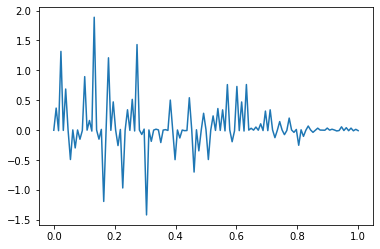

In [129]:
plt.plot(t, w2)

In [ ]:
fig1, ax = plt.subplots(figsize=(10,10))
for _ in range(7):
    norm_vec = np.random.randn(2**N-1)
    w2 = np.array([
        w(t_i, N, norm_vec) for t_i in t
    ])
    ax.plot(t,w2)

fig.show()

# Метод Вінера

In [116]:
def phi(t,k):
    return (np.sqrt(2) *
            np.sin(np.pi * k * t) /
            (np.pi * k))


def w(t, m, norm_rvs):
    start = t * np.random.randn()
    phi_vec = np.array(list(map(
        lambda k: phi(t,k),
        list(range(1,m))
    )))
    return (
            start +
            np.dot(phi_vec, norm_rvs)
            )

In [119]:
norm_vec = np.random.randn(N-1)
w3 = np.array([
    w(t_i,N, norm_vec)
    for t_i in t
])#.cumsum()

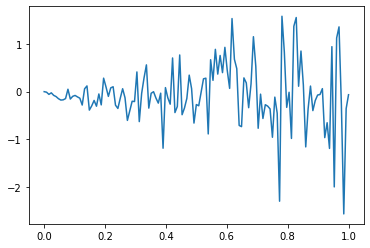

In [120]:
plt.plot(t, w3)